# Exploratory Data Analysis

## Packages

In [1]:
import re
import pathlib
from ast import literal_eval

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
import matplotlib
matplotlib.style.use('tableau-colorblind10')
plt.rcParams['font.size'] = 15

## Constants

In [3]:
DATASET_PATH = "../data/raw/dataset.csv"

## Load Data

### Dataset

https://huggingface.co/datasets/recipe_nlg

Columns

* id (int): ID.
* title (str): Title of the recipe.
* ingredients (list of str): Ingredients.
* directions (list of str): Instruction steps.
* ner (list of str): NER food entities.

In [4]:
stripper = lambda x: x.strip("[]").replace("'","").replace('"','').split(", ")
dataset = pd.read_csv(DATASET_PATH, index_col=0, converters={"directions":stripper, "ingredients":stripper})

## Analysis

In [5]:
print(f"Total number of recipes: {len(dataset)}")

Total number of recipes: 2231142


Let us examine the number of ingredients per recipe:

In [6]:
ingr_per_recipe = dataset["ingredients"].apply(len)
ingr_per_recipe.describe()

count    2.231142e+06
mean     8.480941e+00
std      3.955155e+00
min      1.000000e+00
25%      6.000000e+00
50%      8.000000e+00
75%      1.000000e+01
max      4.020000e+02
Name: ingredients, dtype: float64

And now see how many steps per recipe we have:

In [7]:
steps_per_recipe = dataset["directions"].apply(len)
steps_per_recipe.describe()

count    2.231142e+06
mean     1.138950e+01
std      9.341517e+00
min      1.000000e+00
25%      5.000000e+00
50%      9.000000e+00
75%      1.500000e+01
max      3.110000e+02
Name: directions, dtype: float64

In [8]:
dataset

,title,directions,ingredients
0,No-Bake Nut Cookies,"[In a heavy 2-quart saucepan, mix brown sugar,...","[brown sugar, milk, vanilla, nuts, butter, bit..."
1,Jewell Ball'S Chicken,"[Place chipped beef on bottom of baking dish.,...","[beef, chicken breasts, cream of mushroom soup..."
2,Creamy Corn,"[In a slow cooker, combine all ingredients. Co...","[frozen corn, cream cheese, butter, garlic pow..."
3,Chicken Funny,"[Boil and debone chicken., Put bite size piece...","[chicken, chicken gravy, cream of mushroom sou..."
4,Reeses Cups(Candy),[Combine first four ingredients and press in 1...,"[peanut butter, graham cracker crumbs, butter,..."
...,...,...,...
2231137,Sunny's Fake Crepes,[Spread hazelnut spread on 1 side of each tort...,"[chocolate hazelnut spread, tortillas, butter,..."
2231138,Devil Eggs,"[Boil eggs on medium for 30mins., Then cool eg...","[eggs, paprika, salt, choice, miracle whip, re..."
2231139,Extremely Easy and Quick - Namul Daikon Salad,[Julienne the daikon and squeeze out the exces...,"[radish, Sesame oil, White sesame seeds, Salt,..."
2231140,Pan-Roasted Pork Chops With Apple Fritters,"[In a large bowl, mix the apple cider with 4 c...","[apple cider, sugar, kosher salt, bay leaves, ..."


Example outlier:

In [9]:
print(f"The biggest number of recipe's steps: {steps_per_recipe.max()}")
dataset.iloc[steps_per_recipe.argmax()].directions

The biggest number of recipe's steps: 311


['Trim 1 inch or more off the butt ends of the asparagus',
 'leaving only the moist',
 'tender part of the stalk.',
 'Pare away the tough green skin from the base of the spear to the end of the stalk.',
 'Remove any tiny leaves sprouting below the base of the tip.',
 'Cut the trimmed asparagus into 2-inch lengths and wash in cold water.',
 'Choose a lidded',
 'shallow pan large enough to accommodate all the asparagus.',
 'Put in 4 tablespoons of the butter',
 'the water',
 'a little salt',
 'and the asparagus.',
 'Cover and turn on the heat to medium.',
 'Cook until the asparagus is tender',
 'but firm.',
 'If',
 'when the asparagus is done',
 'there is still liquid in the pan',
 'uncover',
 'raise the heat to high',
 'and boil away the liquid while browning the asparagus lightly.',
 'Cut up the ham and chop it in a food processor',
 'but take care not to chop it too fine.',
 'Add the asparagus to the processor bowl and run the processor very briefly once or twice.',
 'The asparagus sh

In [10]:
print(f"The biggest number of recipe's ingredients: {ingr_per_recipe.max()}")
dataset.iloc[ingr_per_recipe.argmax()].ingredients

The biggest number of recipe's ingredients: 402


['chopped meat',
 'egg',
 'bread crumbs',
 'ketchup',
 'salt',
 'pepper',
 'potatoes',
 'ham end',
 'milk',
 'bread crumbs',
 'butter',
 'ham steak',
 'celery',
 'mayonnaise',
 'chicken soup',
 'lemon juice',
 'eggs',
 'mushroom stems',
 'walnuts',
 'butter',
 'stuffing mix',
 'corn bread',
 'ground ham',
 'Cheddar cheese soup',
 'bread crumbs',
 'onion soup mix',
 'butter',
 'flour',
 'salt',
 'boneless veal',
 'paprika',
 'chicken broth',
 'mushrooms',
 'onions',
 'steak sauce',
 'hot buttered noodles',
 'beef',
 'ditalini macaroni',
 'garbanzo beans',
 'chicken',
 'sour cream',
 'Cheddar cheese soup',
 'oregano',
 'garlic powder',
 'salt',
 'black pepper',
 'soy sauce',
 'beef',
 'eggs',
 'Italian style bread crumbs',
 'Parmesan cheese',
 'oregano',
 'spaghetti sauce',
 'sweet Italian sausage',
 'instant rice',
 'chicken broth',
 'shrimp',
 'sausage',
 'green pepper',
 'celery',
 'onions',
 'tomatoes',
 'tomato soup',
 'pepper sauce',
 'black pepper',
 'salt',
 'garlic powder',
 'bu

### Filtering

We will filter out the recipes having many steps or ingredients.

In [11]:
dataset = dataset[dataset["directions"].apply(len) <= 15]
dataset = dataset[dataset["ingredients"].apply(len) <= 20]

dataset.reset_index(inplace=True, drop=True)

In [12]:
print(f"Number of recipes after filtering: {len(dataset)}")

Number of recipes after filtering: 1729362


### 10 most common ingredients

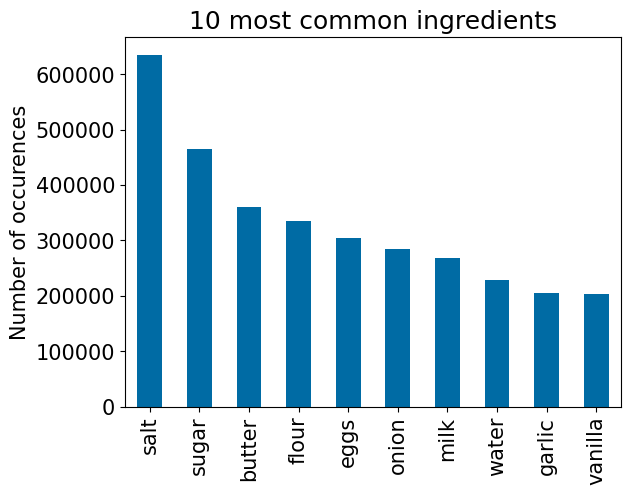

In [13]:
vcs = dataset["ingredients"].explode().value_counts()

vcs[:10].plot(
    kind='bar',
    ylabel= "Number of occurences",
    title = "10 most common ingredients")
plt.show()

In [14]:
print(f"The total number of varius ingredients is {len(set(vcs.index))}")

The total number of varius ingredients is 167968


Furthermore, we will filter out the recipes that contain rare ingredients. A rare ingredient is an ingredient that has been used less than 5 times among all recipes

In [15]:
selected_ingredients = set(vcs[vcs >= 5].index)

In [16]:
dataset = dataset[dataset["ingredients"].explode().isin(selected_ingredients).groupby(level=0).all()]

In [17]:
print(f"After the filtering, the number of various ingredients is {len(selected_ingredients)}")

After the filtering, the number of various ingredients is 28158


### How many ingredients per recipe?

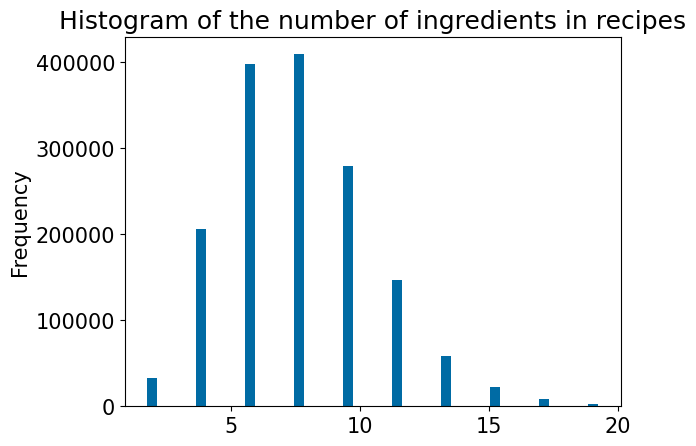

In [18]:
dataset["ingredients"].apply(len).plot(
    kind="hist",
    rwidth=.2,
    xlabel = "Number of recipe's ingredients",
    title = "Histogram of the number of ingredients in recipes"
)
plt.show()

### How many steps per recipe?

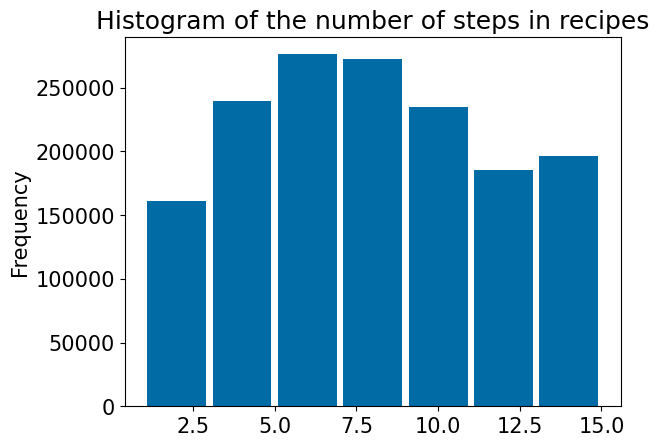

In [19]:
dataset["directions"].apply(len).plot(
    kind="hist",
    bins = 7,
    rwidth=.9,
    xlabel = "Number of recipe's steps",
    title = "Histogram of the number of steps in recipes"
)
plt.show()